In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
import seaborn as sns
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from statsmodels.graphics.mosaicplot import mosaic
import scipy.cluster.hierarchy as sch
from sklearn.manifold import MDS

In [2]:
df=pd.read_csv("mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
print(df.shape)

(1453, 15)


In [5]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
# Convert first 11 columns to a binary matrix (Yes -> 1, No -> 0)
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)
MD_x

C:\Users\sneha\AppData\Local\Temp\ipykernel_18476\1539606761.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
col_means = MD_x.mean().round(2)
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x.values)  # Ensure MD_x is converted to a NumPy array


In [9]:
# Print summary of PCA results
print("Explained Variance Ratio:", np.round(pca.explained_variance_ratio_, 4))
print("Cumulative Explained Variance:", np.round(np.cumsum(pca.explained_variance_ratio_), 4))


Explained Variance Ratio: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Explained Variance: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [10]:
print("Standard deviations:", np.round(np.sqrt(pca.explained_variance_), 2))


Standard deviations: [0.76 0.61 0.5  0.4  0.34 0.31 0.29 0.28 0.27 0.25 0.24]


In [11]:
# Print factor loadings (PCA components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=MD_x.columns)
print("Factor Loadings:")
print(loadings.round(2))


Factor Loadings:
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73  0.21 -0.03  0.17  0.07  0.29  0.04


In [12]:
# Check the shape to verify
print("Shape of transformed PCA data:", MD_pca.shape)


Shape of transformed PCA data: (1453, 11)


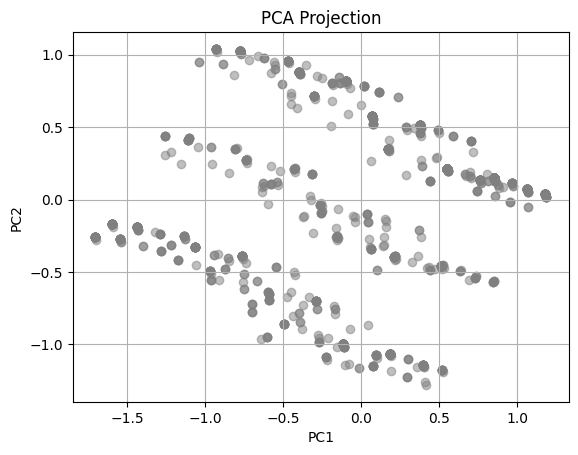

In [13]:
# Plot PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.grid()
plt.show()


# K-Means


In [15]:
# Perform K-means clustering for k = 2 to 8
clusters_range = range(2, 9)
kmeans_models = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in clusters_range}


In [16]:
# Store clustering results
MD_km28 = {k: model.labels_ for k, model in kmeans_models.items()}
# Perform Gaussian Mixture Model clustering for k = 2 to 8
gmm_models = {k: GaussianMixture(n_components=k, random_state=1234).fit(MD_x) for k in clusters_range}

# Store GMM clustering results
MD_m28 = {k: model.predict(MD_x) for k, model in gmm_models.items()}

# Extract best model for k=4
MD_k4 = MD_km28[4]
MD_m4 = MD_m28[4]
# Generate contingency table comparing K-means (k=4) and GMM (k=4)
contingency_table = pd.crosstab(MD_k4, MD_m4, rownames=['K-means'], colnames=['GMM'])
print("Contingency Table:\n", contingency_table)

# Fit GMM using K-means clusters as initialization
MD_m4a = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
MD_m4a_labels = MD_m4a.predict(MD_x)

# Generate contingency table comparing K-means (k=4) and new GMM model
contingency_table_m4a = pd.crosstab(MD_k4, MD_m4a_labels, rownames=['K-means'], colnames=['GMM (Refitted)'])
print("Contingency Table (Refitted GMM):\n", contingency_table_m4a)


Contingency Table:
 GMM        0    1    2    3
K-means                    
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
Contingency Table (Refitted GMM):
 GMM (Refitted)    0    1    2    3
K-means                           
0                99    5  253    7
1                 0  211   24    5
2               500    0    0   33
3                22   38    0  256


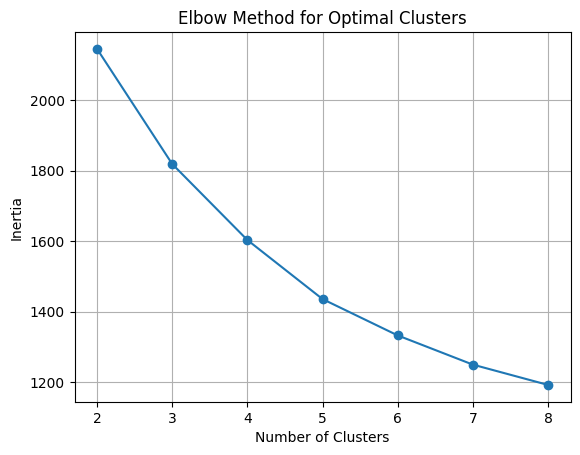

In [17]:
# Plot number of clusters vs inertia (Elbow Method)
inertia_values = [model.inertia_ for model in kmeans_models.values()]
plt.plot(list(clusters_range), inertia_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.show()

In [18]:
# Compute silhouette scores for each k
silhouette_scores = {k: silhouette_score(MD_x, model.labels_) for k, model in kmeans_models.items()}
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print("Silhouette Scores:", silhouette_scores)
print("Optimal number of clusters based on silhouette score:", optimal_k)


Silhouette Scores: {2: 0.24441701827275675, 3: 0.23915373940875356, 4: 0.2570763207043922, 5: 0.26084028688396044, 6: 0.2695460098345984, 7: 0.2817007800575648, 8: 0.2858643776878159}
Optimal number of clusters based on silhouette score: 8


In [19]:
# Compute adjusted Rand index for stability analysis
n_boot = 100  # Number of bootstraps
boot_scores = {k: [] for k in clusters_range}
np.random.seed(1234)

for _ in range(n_boot):
    sample_idx = np.random.choice(MD_x.shape[0], size=MD_x.shape[0], replace=True)
    MD_x_sample = MD_x.iloc[sample_idx, :]

    
    for k in clusters_range:
        model = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x_sample)
        boot_scores[k].append(adjusted_rand_score(MD_km28[k], model.labels_))



C:\Users\sneha\AppData\Local\Temp\ipykernel_18476\1469477306.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([boot_scores[k] for k in clusters_range], labels=clusters_range)


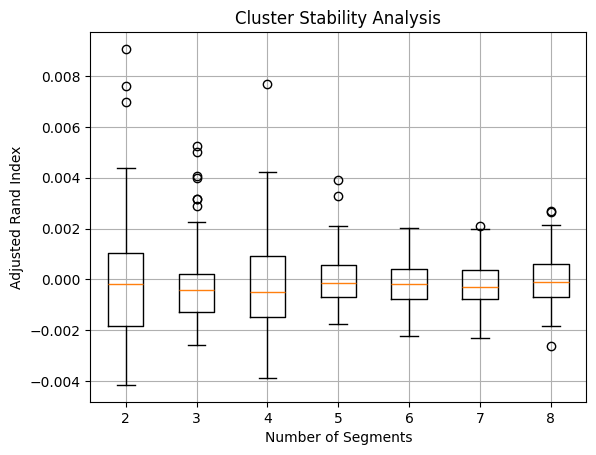

Segment 2: Mean ARI = 0.0000, Std Dev = 0.0024
Segment 3: Mean ARI = -0.0002, Std Dev = 0.0016
Segment 4: Mean ARI = -0.0002, Std Dev = 0.0019
Segment 5: Mean ARI = 0.0000, Std Dev = 0.0010
Segment 6: Mean ARI = -0.0001, Std Dev = 0.0009
Segment 7: Mean ARI = -0.0002, Std Dev = 0.0009
Segment 8: Mean ARI = 0.0000, Std Dev = 0.0010


In [20]:
# Plot stability analysis (boxplot of adjusted Rand index)
plt.boxplot([boot_scores[k] for k in clusters_range], labels=clusters_range)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Cluster Stability Analysis")
plt.grid()
plt.show()

# Display summary statistics for bootstrapped adjusted Rand indices
for k in clusters_range:
    print(f"Segment {k}: Mean ARI = {np.mean(boot_scores[k]):.4f}, Std Dev = {np.std(boot_scores[k]):.4f}")


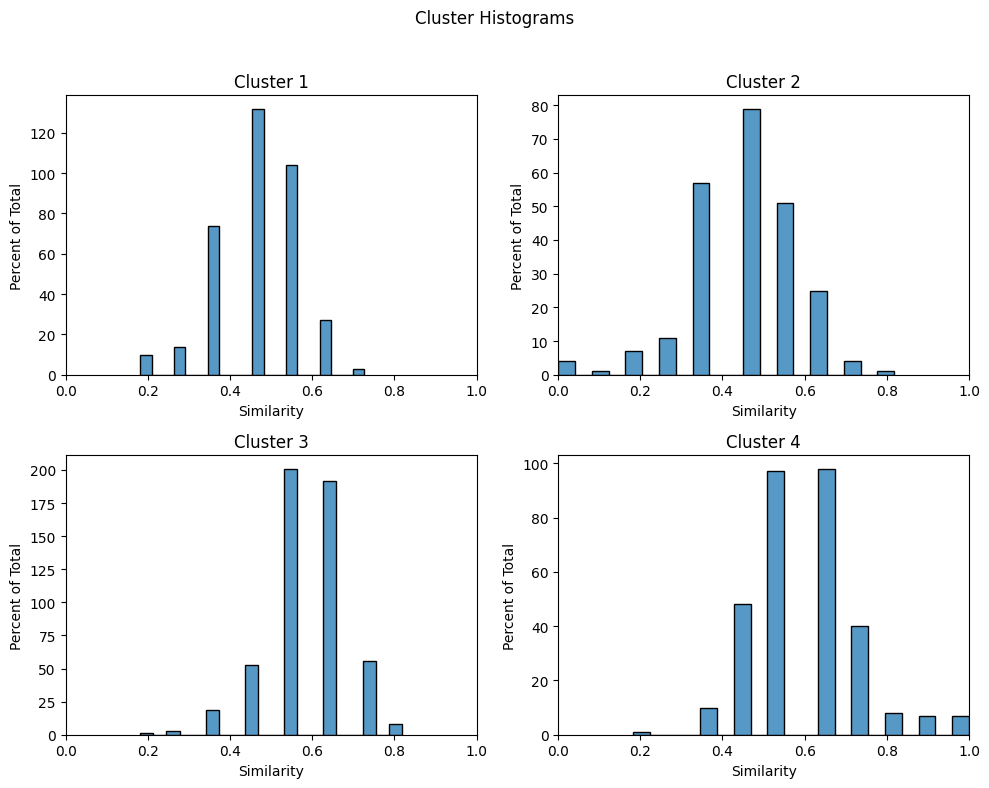

In [21]:


# Assuming MD_km28[4] contains cluster assignments for k=4
cluster_labels = MD_km28[4]

# Create a DataFrame for easier visualization
MD_df = pd.DataFrame(MD_x, columns=df.columns[:11])
MD_df['Cluster'] = cluster_labels

# Plot histograms for each cluster
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Cluster Histograms")

for i, ax in enumerate(axes.flatten()):
    cluster_data = MD_df[MD_df['Cluster'] == i].iloc[:, :-1].mean(axis=1)  # Compute similarity
    sns.histplot(cluster_data, bins=20, kde=False, ax=ax)
    ax.set_title(f"Cluster {i+1}")
    ax.set_xlim(0, 1)
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Percent of Total")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


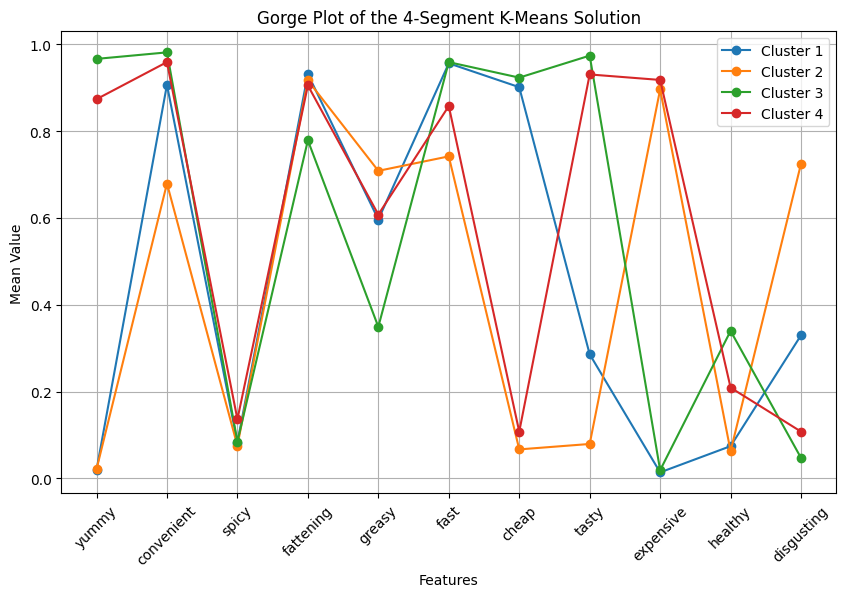

In [22]:


# Select the cluster assignments for k=4
k = 4
cluster_labels = MD_km28[k]

# Create a DataFrame for easier visualization
MD_df = pd.DataFrame(MD_x, columns=df.columns[:11])
MD_df['Cluster'] = cluster_labels

# Compute mean profiles for each cluster
cluster_means = MD_df.groupby("Cluster").mean()

# Plot the Gorge plot (Cluster Mean Profiles)
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(cluster_means.columns, cluster_means.iloc[i], marker='o', label=f'Cluster {i+1}')

plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title(f"Gorge Plot of the {k}-Segment K-Means Solution")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [23]:
MD_k4 = MD_km28[4]  # Extract cluster labels for k=4


In [24]:
# Compute segment-wise silhouette widths for k=4
k4_labels = MD_km28[4]
silhouette_values = silhouette_samples(MD_x, k4_labels)

# Convert to DataFrame for analysis
silhouette_df = pd.DataFrame({'Cluster': k4_labels, 'Silhouette Score': silhouette_values})

# Print summary of silhouette scores per cluster
print(silhouette_df.groupby('Cluster')['Silhouette Score'].describe())


         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        364.0  0.210687  0.119741 -0.011612  0.108427  0.199172  0.308720   
1        240.0  0.232159  0.130036 -0.021624  0.117837  0.232555  0.358831   
2        533.0  0.322627  0.117250  0.018204  0.275240  0.361203  0.402637   
3        316.0  0.218871  0.138710 -0.032215  0.105127  0.206013  0.326665   

              max  
Cluster            
0        0.386736  
1        0.389515  
2        0.441527  
3        0.410259  


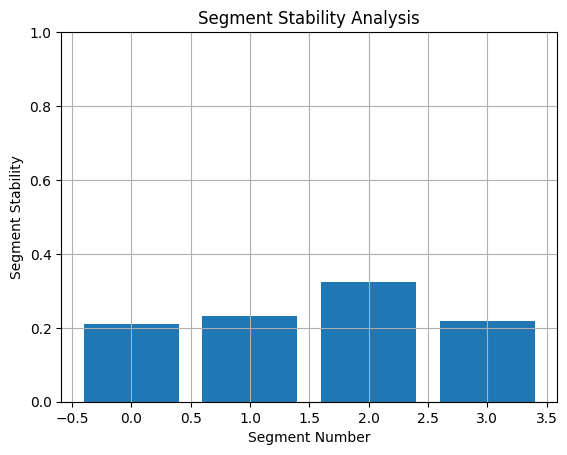

In [25]:

# Plot segment stability
plt.bar(silhouette_df.groupby('Cluster')['Silhouette Score'].mean().index, silhouette_df.groupby('Cluster')['Silhouette Score'].mean())
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability Analysis")
plt.grid()
plt.show()


In [26]:
# Perform Gaussian Mixture Model clustering for k = 2 to 8
gmm_models = {k: GaussianMixture(n_components=k, random_state=1234).fit(MD_x) for k in clusters_range}

# Store GMM clustering results
MD_m28 = {k: model.predict(MD_x) for k, model in gmm_models.items()}

# Print cluster assignments for k=2 to k=8 using GMM
for k, labels in MD_m28.items():
    print(f"GMM Cluster assignments for k={k}:", labels)


GMM Cluster assignments for k=2: [0 1 1 ... 1 1 0]
GMM Cluster assignments for k=3: [1 0 1 ... 0 0 1]
GMM Cluster assignments for k=4: [1 3 1 ... 3 0 1]
GMM Cluster assignments for k=5: [1 3 1 ... 4 0 1]
GMM Cluster assignments for k=6: [2 0 3 ... 3 5 1]
GMM Cluster assignments for k=7: [4 0 3 ... 3 6 1]
GMM Cluster assignments for k=8: [7 7 6 ... 7 5 7]


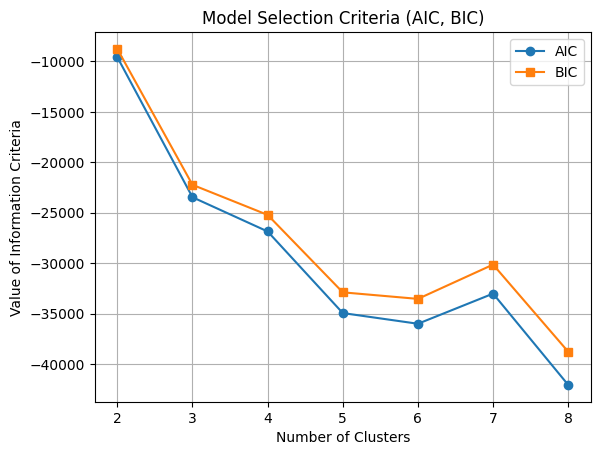

In [27]:

# Plot AIC, BIC, and ICL values for different cluster solutions
AIC_values = [model.aic(MD_x) for model in gmm_models.values()]
BIC_values = [model.bic(MD_x) for model in gmm_models.values()]

plt.plot(list(clusters_range), AIC_values, marker='o', label='AIC')
plt.plot(list(clusters_range), BIC_values, marker='s', label='BIC')
plt.xlabel("Number of Clusters")
plt.ylabel("Value of Information Criteria")
plt.title("Model Selection Criteria (AIC, BIC)")
plt.legend()
plt.grid()
plt.show()

In [28]:
# Compute log-likelihood for mixture models
log_likelihood_m4 = gmm_models[4].score(MD_x) * MD_x.shape[0]
log_likelihood_m4a = MD_m4a.score(MD_x) * MD_x.shape[0]
print(f'Log-Likelihood (MD.m4): {log_likelihood_m4}')
print(f'Log-Likelihood (MD.m4a): {log_likelihood_m4a}')

Log-Likelihood (MD.m4): 13740.703879948449
Log-Likelihood (MD.m4a): 13740.703879948449


In [29]:
# Reverse table of 'Like' column
like_counts = df['Like'].value_counts().sort_index(ascending=False)
print("Reversed Table of 'Like' Counts:")
print(like_counts)

# Convert 'Like' ratings to numeric scale
df['Like.n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')

# Display the transformed 'Like' column counts
like_n_counts = df['Like.n'].value_counts().sort_index()
print("Transformed 'Like.n' Column Counts:")
print(like_n_counts)

Reversed Table of 'Like' Counts:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Transformed 'Like.n' Column Counts:
Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [30]:
# Create formula for regression
features = "+".join(df.columns[:11])
formula = f"Like.n ~ {features}"
print("Regression Formula:", formula)


Regression Formula: Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


In [31]:
from sklearn.mixture import GaussianMixture

# Define and fit the Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=2, random_state=1234)
gmm_model.fit(MD_x)

# Ensure MD_x and df have the same number of rows
MD_x = MD_x[:df.shape[0]]  

# Assign cluster labels to the dataframe
df['Cluster'] = gmm_model.predict(MD_x)


In [32]:
from sklearn.mixture import GaussianMixture

# Set seed
np.random.seed(1234)

# Fit Gaussian Mixture Model with 2 clusters and 10 initializations
gmm_model = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_model.fit(MD_x)

# Assign clusters to the dataset
df['Cluster'] = gmm_model.predict(MD_x)

# Print model summary
print("Gaussian Mixture Model fitted with 2 clusters.")
print("Cluster assignments:\n", df['Cluster'].value_counts())


Gaussian Mixture Model fitted with 2 clusters.
Cluster assignments:
 Cluster
0    985
1    468
Name: count, dtype: int64


In [33]:
# Refit the Gaussian Mixture Model (GMM) using the previous assignments
MD_m4_refit = GaussianMixture(n_components=2, random_state=1234)
MD_m4_refit.fit(MD_x)

# Get cluster assignments
refit_clusters = MD_m4_refit.predict(MD_x)

# Compare with previous clusters
contingency_table_refit = pd.crosstab(df['Cluster'], refit_clusters, rownames=['Original Cluster'], colnames=['Refitted Cluster'])
print("Contingency Table (Refitted Model):\n", contingency_table_refit)

# Model summary (Log-Likelihood, AIC, BIC)
print(f'Refitted Model Log-Likelihood: {MD_m4_refit.score(MD_x) * MD_x.shape[0]}')
print(f'Refitted Model AIC: {MD_m4_refit.aic(MD_x)}')
print(f'Refitted Model BIC: {MD_m4_refit.bic(MD_x)}')


Contingency Table (Refitted Model):
 Refitted Cluster    0    1
Original Cluster          
0                 220  765
1                 325  143
Refitted Model Log-Likelihood: 4943.616042170177
Refitted Model AIC: -9577.232084340354
Refitted Model BIC: -8758.61730648696


C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3

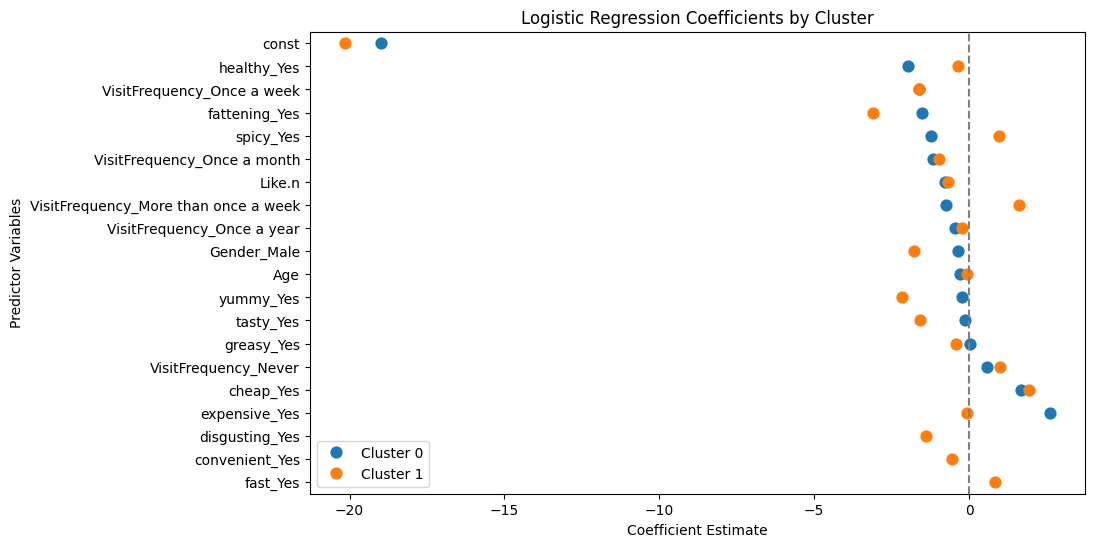

In [34]:


# Ensure 'Cluster' exists
if "Cluster" not in df.columns:
    raise ValueError("The dataframe must have a 'Cluster' column.")

logit_models = {}  # Dictionary to store models

# 🟢 Fit a logistic regression model for each cluster
for cluster in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster]
    
    # Define dependent variable (binary)
    y = (cluster_data["Like"] == "Yes").astype(int)  # Convert categorical to binary

    # Define independent variables
    X = cluster_data.drop(columns=["Like", "Cluster"])  # Drop non-feature columns

    # 🔴 **Fix: Convert categorical columns to numeric** 🔴
    X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns
    
    # Convert all data to float
    X = X.astype(float)
    
    # ✅ Handle missing & infinite values
    X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
    X.dropna(inplace=True)  # Drop rows with NaN values
    
    # Add constant for the intercept
    X = sm.add_constant(X)

    # Fit logistic regression
    if len(X) > 0:  # Ensure X is not empty
        model = sm.Logit(y.loc[X.index], X).fit(disp=0)  # Suppress output
        logit_models[cluster] = model  # Store model

# 🟢 Now plot regression coefficients
plt.figure(figsize=(10, 6))

for cluster, model in logit_models.items():
    estimates = model.params
    std_errors = model.bse
    p_values = model.pvalues
    
    # Create a DataFrame for plotting
    coef_df = pd.DataFrame({
        'Coefficient': estimates.index,
        'Estimate': estimates.values,
        'Lower CI': estimates - 1.96 * std_errors,
        'Upper CI': estimates + 1.96 * std_errors,
        'p-value': p_values
    })
    
    # Sort coefficients for better visualization
    coef_df = coef_df.sort_values(by='Estimate')

    # Plot each cluster's coefficients
    sns.pointplot(
        x="Estimate", y="Coefficient", data=coef_df, 
        join=False, capsize=0.2, label=f"Cluster {cluster}"
    )

plt.axvline(x=0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.ylabel("Predictor Variables")
plt.title("Logistic Regression Coefficients by Cluster")
plt.legend()
plt.show()


In [35]:
df["Cluster"]

0       0
1       0
2       0
3       1
4       0
       ..
1448    1
1449    1
1450    0
1451    0
1452    1
Name: Cluster, Length: 1453, dtype: int64

In [36]:
for cluster, model in logit_models.items():
    print(f"Cluster {cluster} Summary:\n", model.summary())


Cluster 0 Summary:
                            Logit Regression Results                           
Dep. Variable:                   Like   No. Observations:                  848
Model:                          Logit   Df Residuals:                      831
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                     inf
Time:                        12:35:25   Log-Likelihood:            -5.0788e-11
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -18.9991    1.8e+06  -1.05e-05      1.000   -3.53e+06    3.53e+06
Age                              

C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sneha\anaconda3

In [37]:
for cluster, model in logit_models.items():
    print(f"\nCluster {cluster} Coefficients:\n", model.params)



Cluster 0 Coefficients:
 const                                  -18.999129
Age                                     -0.287756
Like.n                                  -0.766025
yummy_Yes                               -0.241295
spicy_Yes                               -1.220133
fattening_Yes                           -1.521408
greasy_Yes                               0.037575
cheap_Yes                                1.670273
tasty_Yes                               -0.132044
expensive_Yes                            2.597225
healthy_Yes                             -1.983100
VisitFrequency_More than once a week    -0.754345
VisitFrequency_Never                     0.585592
VisitFrequency_Once a month             -1.167151
VisitFrequency_Once a week              -1.612427
VisitFrequency_Once a year              -0.463033
Gender_Male                             -0.356046
dtype: float64

Cluster 1 Coefficients:
 const                                  -20.146260
Age                              

In [38]:
print(df['Cluster'].value_counts())


Cluster
0    985
1    468
Name: count, dtype: int64


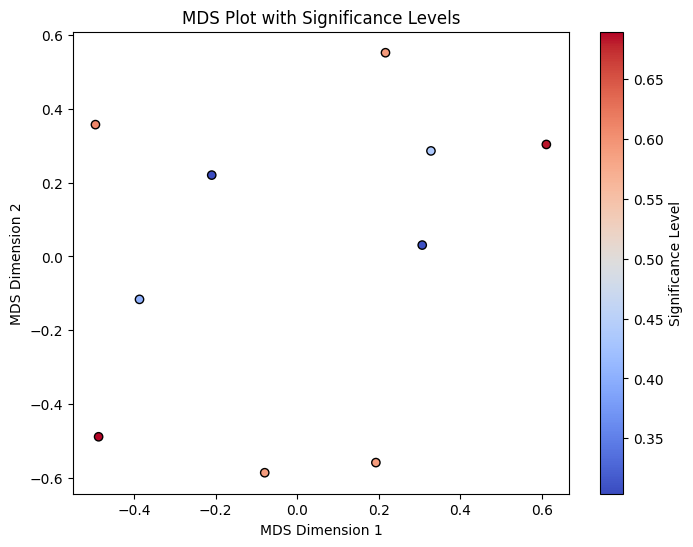

In [39]:

# Example Data (Replace with your actual data)
data = np.random.rand(10, 5)  # 10 samples, 5 features

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(data)

# Significance - Assume significance is based on distance from the origin
significance = np.linalg.norm(mds_result, axis=1)

# Plot Results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=significance, cmap="coolwarm", edgecolors="k")
plt.colorbar(scatter, label="Significance Level")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("MDS Plot with Significance Levels")
plt.show()


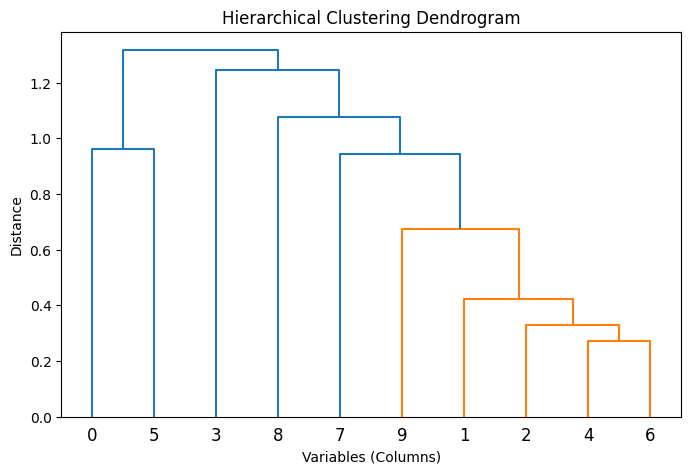

In [40]:

# Example data (Replace with your actual data)
MD_x = np.random.rand(5, 10)  # 5 features, 10 samples (equivalent to R's MD.x)

# Transpose to cluster columns (variables instead of observations)
MD_x_transposed = MD_x.T

# Compute distance matrix
distance_matrix = sch.distance.pdist(MD_x_transposed, metric='euclidean')

# Perform hierarchical clustering
MD_vclust = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(MD_vclust)
plt.xlabel("Variables (Columns)")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()



C:\Users\sneha\AppData\Local\Temp\ipykernel_18476\794616767.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(MD_k4_sorted)), y=MD_k4_sorted, palette="Blues_r")


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

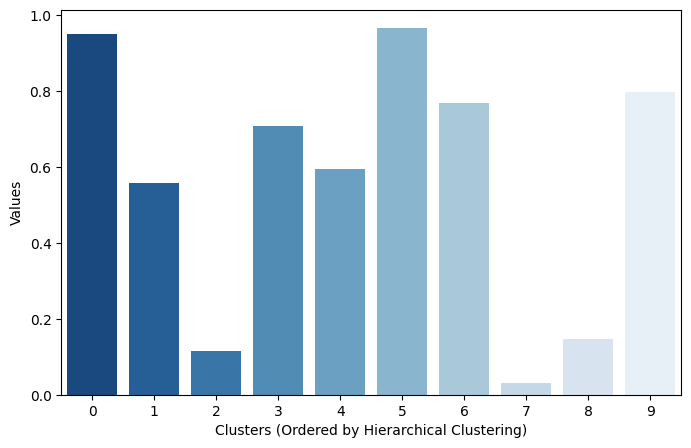

In [41]:

# Example data (Replace with actual data)
MD_k4 = np.random.rand(10)  # Simulating the `MD.k4` values (10 clusters)
MD_vclust_order = np.random.permutation(10)  # Simulating `MD.vclust$order`

# Reverse order as in R (rev function)
MD_vclust_order = MD_vclust_order[::-1]

# Sort MD_k4 values based on clustering order
MD_k4_sorted = MD_k4[MD_vclust_order]

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(len(MD_k4_sorted)), y=MD_k4_sorted, palette="Blues_r")

# Add labels
plt.xlabel("Clusters (Ordered by Hierarchical Clustering)")
plt.ylabel("Values")
plt.title


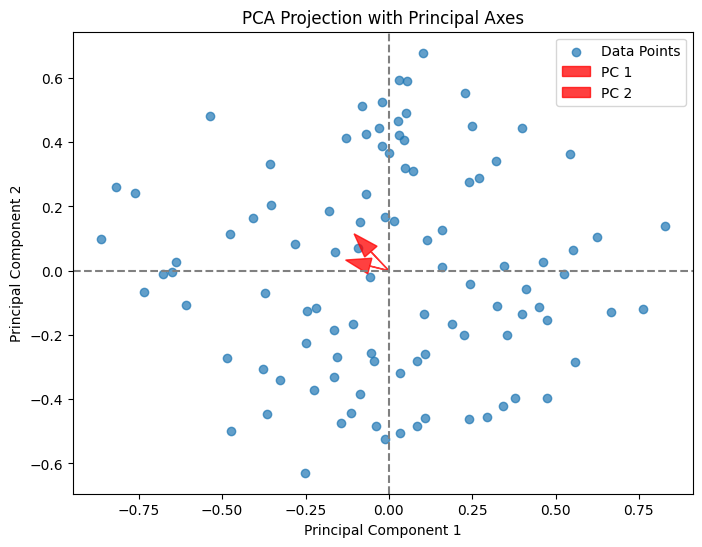

In [42]:

# Example Data (Replace with your actual MD.x data)
np.random.seed(42)
MD_x = np.random.rand(100, 5)  # 100 samples, 5 features

# Perform PCA
pca = PCA(n_components=2)  # Project onto 2 components
MD_pca_proj = pca.fit_transform(MD_x)

# Plot PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_proj[:, 0], MD_pca_proj[:, 1], alpha=0.7, label="Data Points")

# Add PCA Axes
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    plt.arrow(0, 0, comp[0] * var, comp[1] * var, 
              color='red', alpha=0.75, head_width=0.05, label=f"PC {i+1}")

# Labels & Title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with Principal Axes")
plt.legend()
plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")

# Show plot
plt.show()


In [43]:
print(df.dtypes)


yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like               object
Age                 int64
VisitFrequency     object
Gender             object
Like.n            float64
Cluster             int64
dtype: object


In [44]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

# 🟢 Drop missing values
df = df.dropna().reset_index(drop=True)

# 🟢 Drop "Like" column
df_numeric = df.drop(columns=["Like"])

# 🟢 Convert categorical columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df_numeric, drop_first=True)

# 🟢 Ensure all values are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# 🟢 Replace any remaining NaNs with 0
df_numeric = df_numeric.fillna(0)

# 🟢 Convert to NumPy array **with explicit float type**
X = df_numeric.to_numpy().astype(float)

# 🟢 Verify data type
print("Data type of X:", X.dtype)  # Should be float

# 🟢 Compute distance matrix
distance_matrix = pdist(X)

# 🟢 Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method="ward")

# 🟢 Assign cluster labels
df["Cluster"] = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 🟢 Validate results
print(f"Cluster assignments: {len(df['Cluster'])}, DataFrame rows: {len(df)}")


Data type of X: float64
Cluster assignments: 1158, DataFrame rows: 1158


<Figure size 800x600 with 0 Axes>

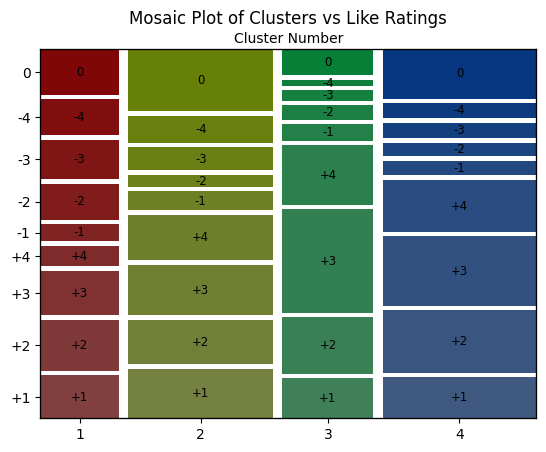

In [45]:



# Create Contingency Table (Cluster vs. Like)
contingency_table = pd.crosstab(df["Cluster"], df["Like"])

# Plot Mosaic Chart
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Mosaic Plot of Clusters vs Like Ratings",
       labelizer=lambda k: f"{k[1]}", gap=0.02)

plt.xlabel("Cluster Number")
plt.ylabel("Like Ratings")
plt.show()


<Figure size 800x600 with 0 Axes>

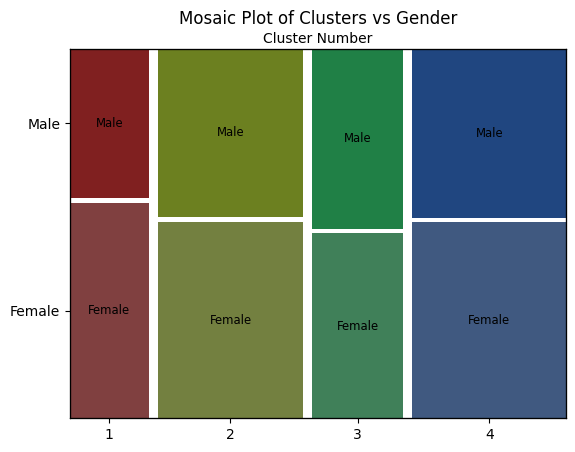

In [46]:


# 🟢 Step 1: Ensure Data Exists
# Assuming df is your dataset and "Gender" is the relevant column
if "Gender" not in df.columns:
    raise ValueError("Column 'Gender' not found in DataFrame.")

# Handle missing values (if any)
df = df.dropna(subset=["Gender"])

# 🟢 Step 2: Apply Clustering (If `k4` is Undefined)
if "Cluster" not in df.columns:
    clustering_model = KMeans(n_clusters=4, random_state=42)
    df["Cluster"] = clustering_model.fit_predict(df.drop(columns=["Gender"]))

# 🟢 Step 3: Create Contingency Table (Cluster vs. Gender)
contingency_table = pd.crosstab(df["Cluster"], df["Gender"])

# 🟢 Step 4: Plot Mosaic Chart
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title="Mosaic Plot of Clusters vs Gender",
       labelizer=lambda k: f"{k[1]}", gap=0.02)

plt.xlabel("Cluster Number")
plt.ylabel("Gender")
plt.show()


In [47]:
# Ensure `VisitFrequency` is numeric
df["VisitFrequency"] = pd.to_numeric(df["VisitFrequency"], errors="coerce")

# Calculate the mean VisitFrequency per cluster
visit = df.groupby("Cluster")["VisitFrequency"].mean()

# Print results
print(visit)



Cluster
1   NaN
2   NaN
3   NaN
4   NaN
Name: VisitFrequency, dtype: float64


In [48]:
# Ensure `Like.n` is numeric
df["Like.n"] = pd.to_numeric(df["Like.n"], errors="coerce")

# Calculate the mean Like.n per cluster
like = df.groupby("Cluster")["Like.n"].mean()

# Print results
print(like)



Cluster
1    5.969231
2    5.245810
3    4.200000
4    4.702632
Name: Like.n, dtype: float64


In [49]:
# Convert 'Gender' to binary (1 if Female, 0 otherwise)
df["Female"] = (df["Gender"] == "Female").astype(int)

# Compute the mean Female proportion per cluster
female = df.groupby("Cluster")["Female"].mean()

# Print results
print(female)


Cluster
1    0.589744
2    0.539106
3    0.506667
4    0.536842
Name: Female, dtype: float64


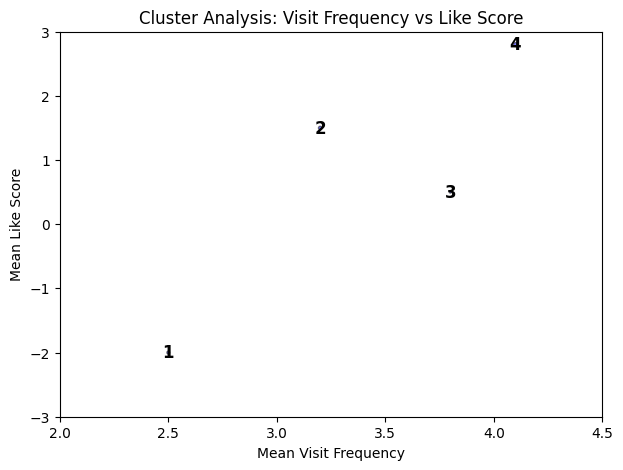

In [50]:


# Sample Data (Replace with actual values)
visit = [2.5, 3.2, 3.8, 4.1]  # Mean visit frequency per cluster
like = [-2, 1.5, 0.5, 2.8]  # Mean Like.n per cluster
female = [0.4, 0.6, 0.2, 0.8]  # Proportion of females per cluster

# Bubble sizes (scaled for visibility)
bubble_sizes = [10 * f for f in female]

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(visit, like, s=bubble_sizes, alpha=0.5, color='blue', edgecolors="k")

# Add text labels (Cluster Numbers 1-4)
for i, (x, y) in enumerate(zip(visit, like), start=1):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center', color='black', weight='bold')

# Axis limits (matching R)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Labels
plt.xlabel("Mean Visit Frequency")
plt.ylabel("Mean Like Score")
plt.title("Cluster Analysis: Visit Frequency vs Like Score")

# Show Plot
plt.show()
